In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv("Dataset/spam.csv", encoding='latin-1')


In [139]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3779,ham,Then ur physics get a-?,NaN,NaN,NaN
2457,ham,K.k..how is your sister kids?,NaN,NaN,NaN
5307,ham,What you did in leave.,NaN,NaN,NaN
605,ham,TaKe CaRE n gET WeLL sOOn,NaN,NaN,NaN
4094,ham,I ain't answerin no phone at what is actually ...,NaN,NaN,NaN


In [140]:
df.shape

(5572, 5)

In [141]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [142]:
# These are the steps. We will perform in this Project.

#1. Data cleaning 
#2. EDA
#3. Text Preprocessing 
#4. Model Building 
#5. Evaluation 
#6. Improvement 
#7. Website 
#8. Deploy

# 1. Data Cleaning 

In [143]:
# Required columns select
df = df[['v1', 'v2']]
df.columns = ['target', 'message']  # Rename columns


In [144]:
df.sample(5)

,target,message
1083,ham,Wat makes some people dearer is not just de ha...
4644,ham,Are you planning to come chennai?
1311,ham,U r too much close to my heart. If u go away i...
3719,ham,"Yeah why not, is the gang all ready"
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...


In [145]:
# Encode labels (spam = 1, ham = 0)

In [146]:


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])




In [147]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [149]:
df.duplicated().sum()

403

In [150]:
# Duplicates Remove

In [151]:
df = df.drop_duplicates( keep='first')



In [152]:
df.duplicated().sum()

0

# 2. EDA 

In [153]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


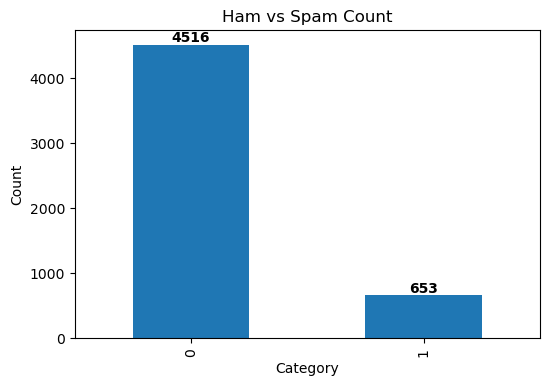

In [154]:

counts = df['target'].value_counts()

plt.figure(figsize=(6,4))
ax = counts.plot(kind='bar')

plt.title("Ham vs Spam Count")
plt.xlabel("Category")
plt.ylabel("Count")

# Har bar ke upar value show kare
for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.show()


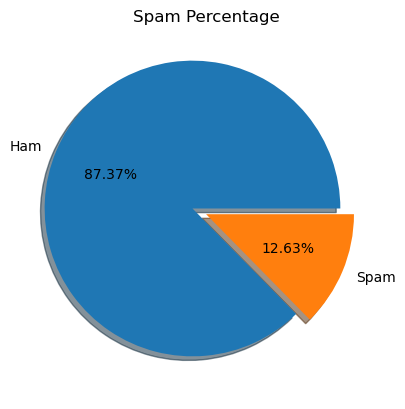

In [155]:
plt.pie(df['target'].value_counts(), 
        labels=['Ham','Spam'], autopct="%0.2f%%", 
        shadow=True, explode=[0.1,0])
plt.title("Spam Percentage")
plt.show()


In [156]:
# Data is imbalanced 

In [157]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [158]:
df['num_characters']= df['message'].apply(len)

In [159]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [160]:
# Word Count

In [161]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))




In [162]:
df.head(5)

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [163]:
# Create num_sentences column

In [164]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [165]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [166]:
 df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
#ham 

df[df['target'] == 0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [168]:
# spam

df[df['target'] == 1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


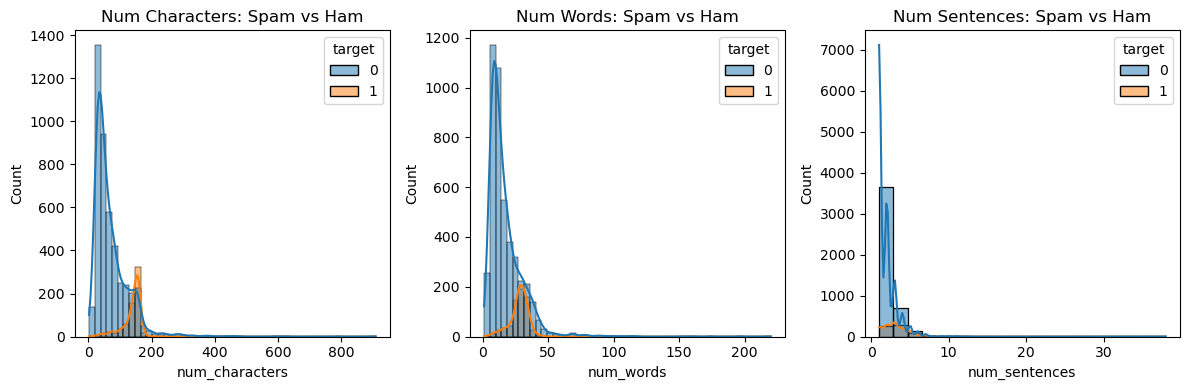

In [169]:

plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='num_characters', hue='target', bins=50, kde=True)
plt.title('Num Characters: Spam vs Ham')

# Subplot 2
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='num_words', hue='target', bins=50, kde=True)
plt.title('Num Words: Spam vs Ham')

# Subplot 3
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='num_sentences', hue='target', bins=20, kde=True)
plt.title('Num Sentences: Spam vs Ham')

# Layout adjust karo taaki overlapping na ho
plt.tight_layout()
plt.show()

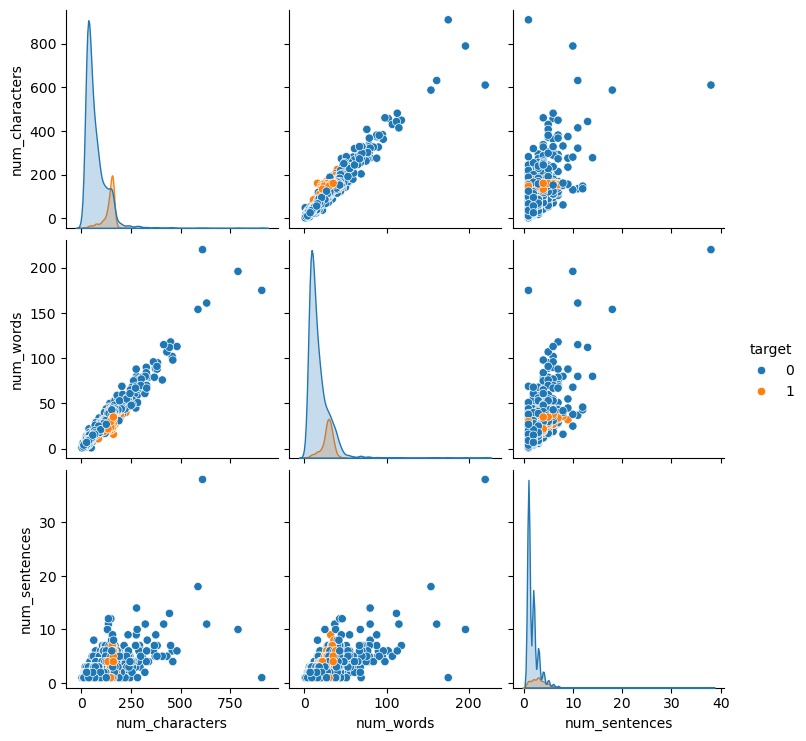

In [170]:
sns .pairplot(df,hue='target')

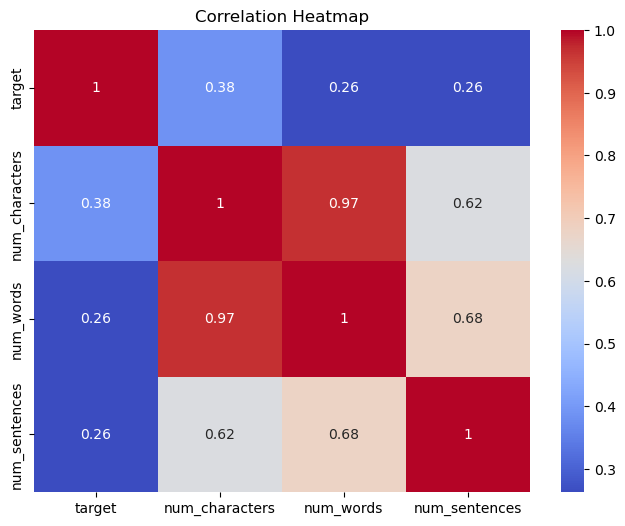

In [171]:


# Only numeric columns
numeric_df = df[['target','num_characters','num_words','num_sentences']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 3. Text Preprocessing

Text preprocessing is an important step in Natural Language Processing (NLP) to clean and normalize text data. The common preprocessing steps include:

1. **Lower Case**  
   Convert all text to lowercase to avoid treating the same words differently.

2. **Tokenization**  
   Split text into individual words or tokens.

3. **Removing Special Characters**  
   Remove punctuation, numbers, and other non-alphabetic characters.

4. **Removing Stop Words and Punctuation**  
   Remove common words (stop words) and punctuation that do not add much meaning.

5. **Stemming**  
   Reduce words to their root form so that similar words are treated the same.


In [172]:
import pandas as pd
import nltk
import re
import string

# Download required NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [173]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [174]:

# Preprocessing function
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 3. Tokenization
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    # 5. Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)


In [175]:
# Example DataFrame
# df['message'] column ko preprocess karna ho
df['clean_message'] = df['message'].apply(preprocess_text)

df.head()

,target,message,num_characters,num_words,num_sentences,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [176]:
# Most frequent Spam Words 

!pip install wordcloud


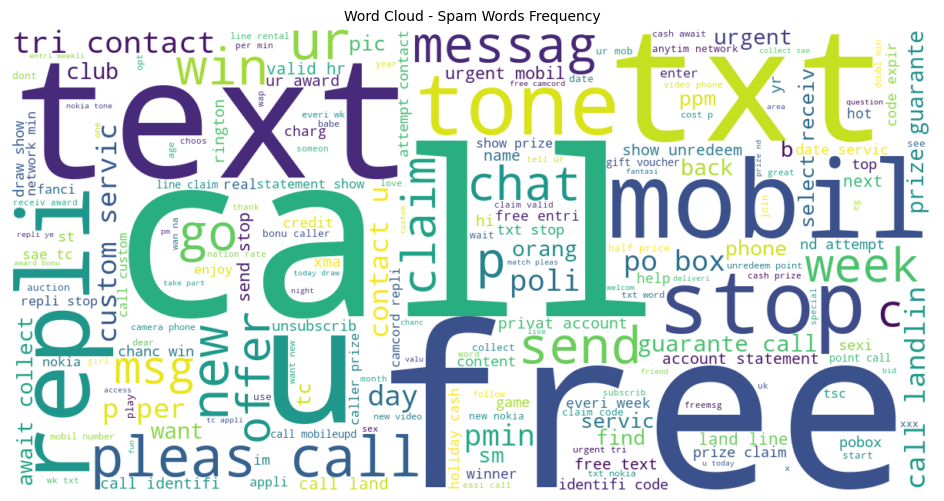

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_text = " ".join(df[df['target'] == 1]['clean_message'])

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(spam_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Spam Words Frequency", fontsize=10)
plt.axis('off')
plt.show()


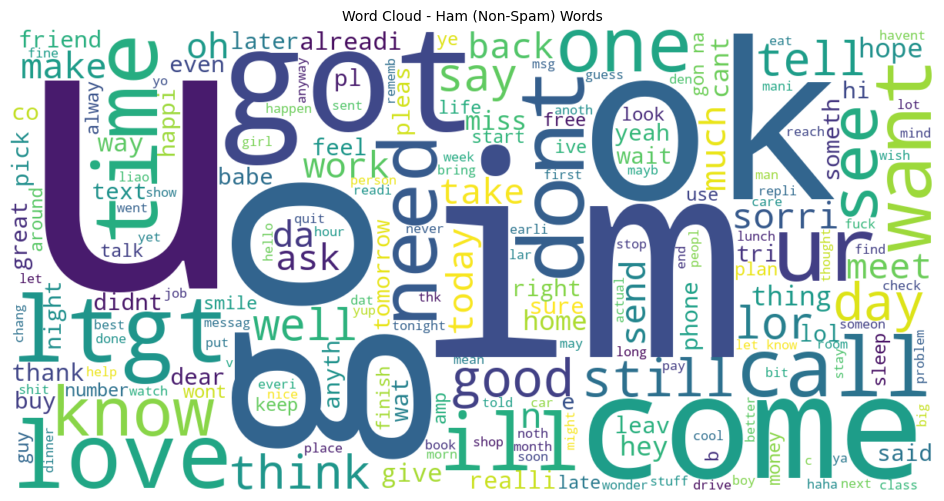

In [178]:
# Filter ham (non-spam) messages only
ham_text = " ".join(df[df['target'] == 0]['clean_message'])

# Generate word cloud
ham_wc = WordCloud(width=1200, height=600, background_color='white').generate(ham_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("Word Cloud - Ham (Non-Spam) Words", fontsize=10)
plt.axis('off')
plt.show()

In [179]:
# Top 30 Spam words 

In [180]:
from collections import Counter
import pandas as pd

# Filter spam messages only
spam_words = " ".join(df[df['target'] == 1]['clean_message']).split()

# Count frequency
word_freq = Counter(spam_words).most_common(30)

# Convert to DataFrame for better display
top_30_spam = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])
top_30_spam


,Word,Frequency
0,call,324
1,free,190
2,txt,138
3,u,130
4,text,122
5,ur,119
6,mobil,115
7,stop,106
8,repli,101
9,claim,98


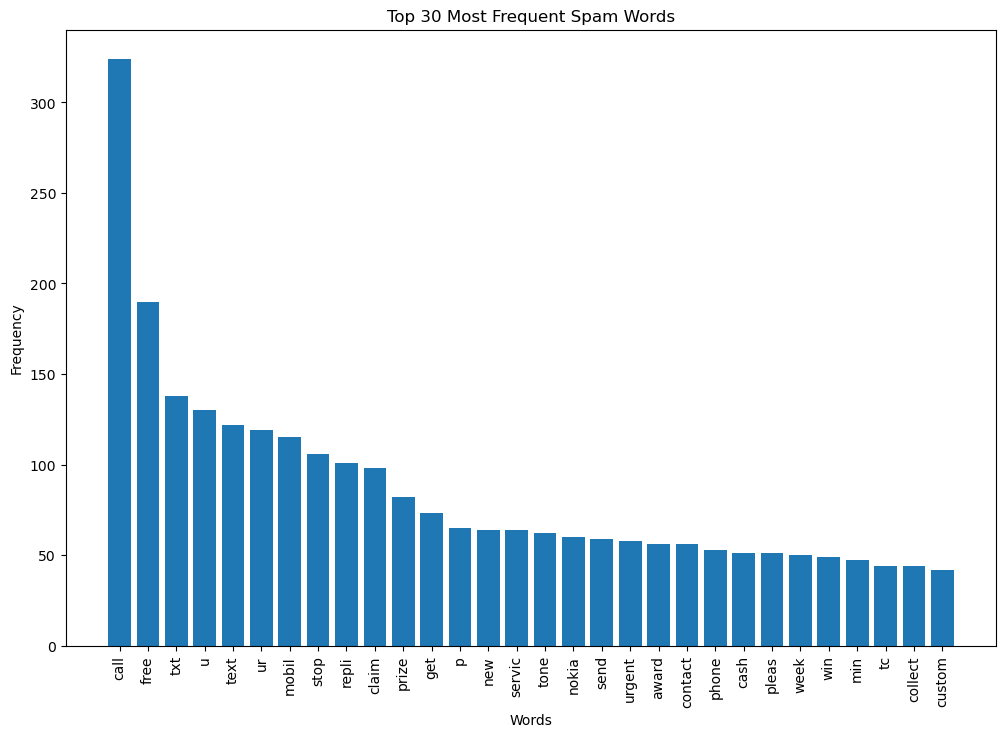

In [181]:
plt.figure(figsize=(12, 8))
plt.bar(top_30_spam['Word'], top_30_spam['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Spam Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()



In [182]:
# Top 30 non- spam words 

In [183]:
from collections import Counter
import pandas as pd

# Filter ham messages only
ham_words = " ".join(df[df['target'] == 0]['clean_message']).split()

# Count frequency
word_freq_ham = Counter(ham_words).most_common(30)

# Convert to DataFrame
top_30_ham = pd.DataFrame(word_freq_ham, columns=['Word', 'Frequency'])
top_30_ham


,Word,Frequency
0,u,890
1,im,447
2,go,403
3,get,354
4,come,272
5,ltgt,254
6,dont,253
7,ok,246
8,got,238
9,like,232


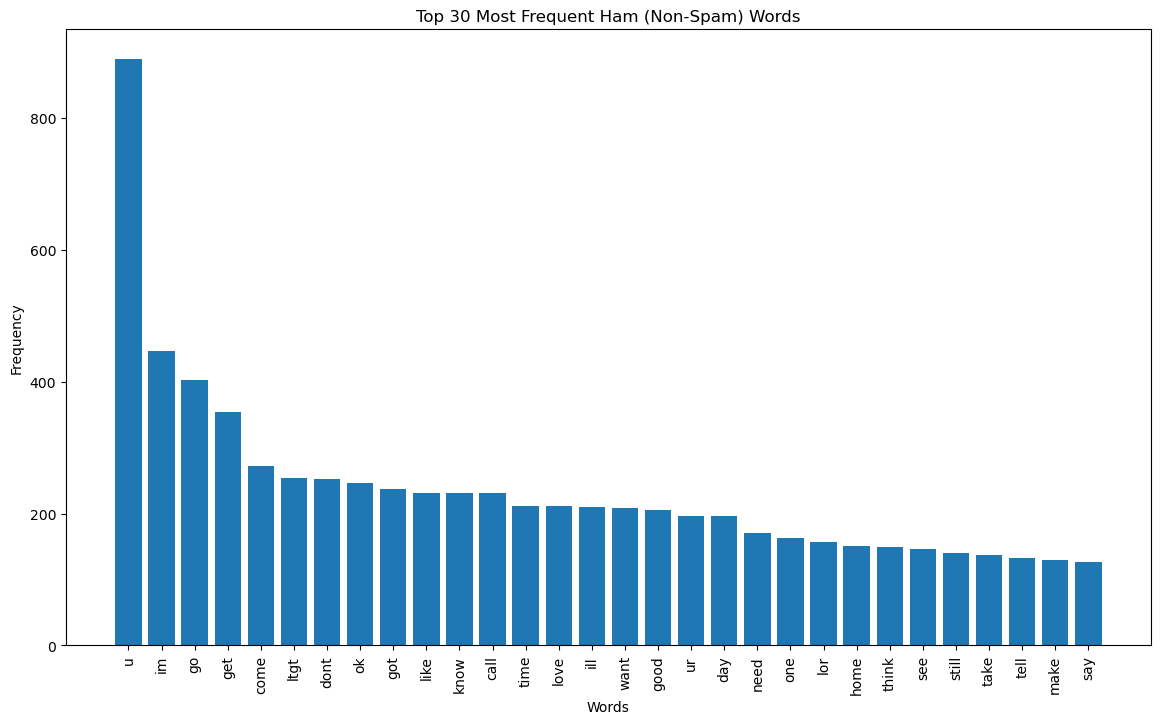

In [184]:


plt.figure(figsize=(14, 8))
plt.bar(top_30_ham['Word'], top_30_ham['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Ham (Non-Spam) Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


# 4. Model Building 

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [186]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_message']).toarray()
y = df['target']


In [187]:
# Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [188]:
# Oversampling - Fix Class Imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [189]:
# Model
gnb = GaussianNB()
mnb=MultinomialNB()
bnb= BernoulliNB()



In [190]:
# Model Training
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)


BernoulliNB()

In [191]:
# Predictions
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

# 5.Evaluation

In [192]:


# Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)
# Precision
precision = precision_score(y_test, y_pred_gnb)
# Recall
recall = recall_score(y_test, y_pred_gnb)
# F1 Score
f1 = f1_score(y_test, y_pred_gnb)

# Print
print("GaussianNB Accuracy :", accuracy)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


GaussianNB Accuracy : 0.8607350096711799
Accuracy : 0.8607
Precision: 0.4714
Recall   : 0.8168
F1 Score : 0.5978


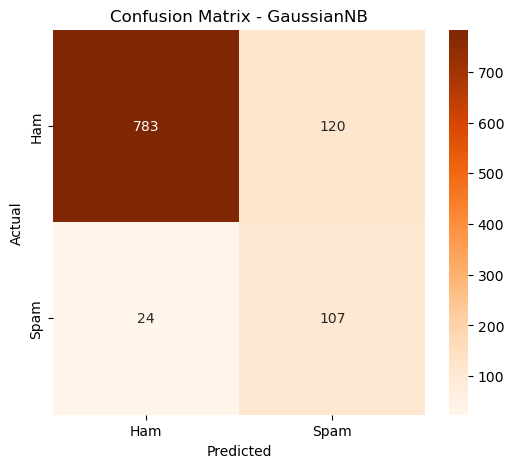

In [193]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GaussianNB")
plt.show()

In [194]:


# Metrics
accuracy = accuracy_score(y_test, y_pred_mnb)
precision = precision_score(y_test, y_pred_mnb)
recall = recall_score(y_test, y_pred_mnb)
f1 = f1_score(y_test, y_pred_mnb)

# Print metrics
print(f"MultinomialNB Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

MultinomialNB Metrics:
Accuracy : 0.9603
Precision: 0.8041
Recall   : 0.9084
F1 Score : 0.8530


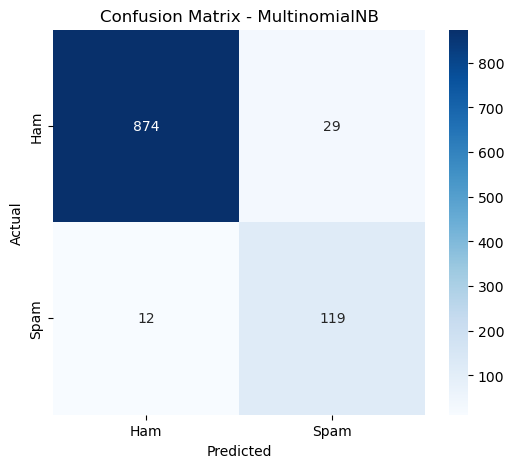

In [195]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MultinomialNB")
plt.show()

In [196]:

# Metrics
accuracy = accuracy_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)
recall = recall_score(y_test, y_pred_bnb)
f1 = f1_score(y_test, y_pred_bnb)

# Print metrics
print(f"BernoulliNB Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

BernoulliNB Metrics:
Accuracy : 0.9845
Precision: 1.0000
Recall   : 0.8779
F1 Score : 0.9350


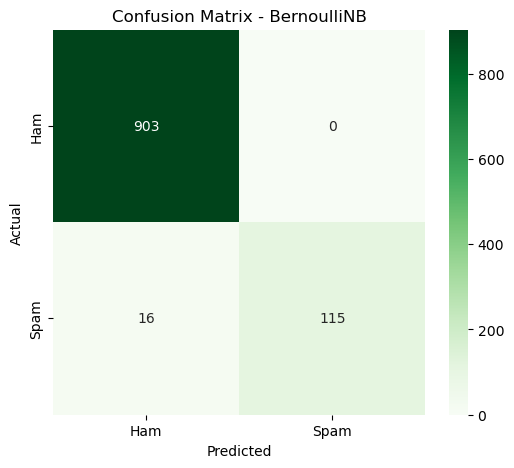

In [197]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BernoulliNB")
plt.show()

In [198]:
# Choose kiya maine tfidf and multinomialNB

# 6. Improvement 

In [199]:
# max feature= 3000 kiya 
 

In [200]:
# Model & Vectorizer .pkl Files Save Karein

In [202]:
import pickle

# Save BernoulliNB Model
with open("spam_bnb_model.pkl", "wb") as f:
    pickle.dump(bnb, f)

# Save TF-IDF Vectorizer (same for both)
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("BernoulliNB Model and TF-IDF Vectorizer Saved Successfully!")


BernoulliNB Model and TF-IDF Vectorizer Saved Successfully!
